# TASK -03


# CodeSoft Internship

# Data Science Tasks : By Vivek Kumar

# Task-03: Build a machine learning model to identify fraudulent credit card <br>transactions.
# Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
# Train a classification algorithm, such as logistic regression or random  forests, to classify transactions as fraudulent or genuine.
# Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

# Importing the Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read CSV file the dataset.

In [17]:
data=pd.read_csv('creditcard.csv')
credit_card=data.copy()

pandas DataFrame

In [3]:
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# show columns name
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# find the datatypes of all columns
credit_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# print shape and size of datasets
print("Shape of Credit_card data:",credit_card.shape)
print("Size of credit_card data: ",credit_card.size)

Shape of Credit_card data: (284807, 31)
Size of credit_card data:  8829017


In [7]:
# find full information regarding data.
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# count how many class
credit_card['Class'].value_counts()   # 0 represent no Fraud and 1 represent Fraud

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

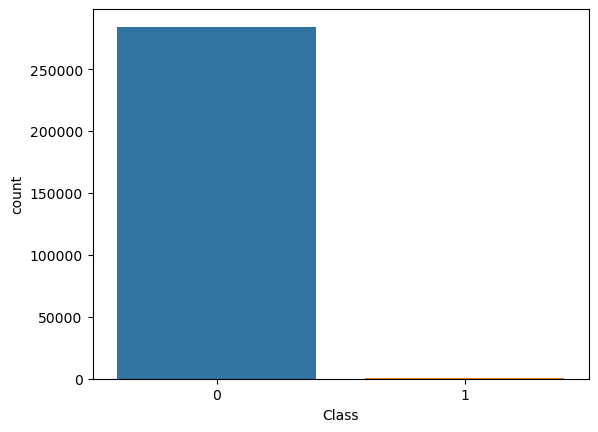

In [9]:
# count class
sns.countplot(x="Class",label="Class",data=credit_card)

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

In [10]:
# describe the data
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# visualisation of data

<Axes: >

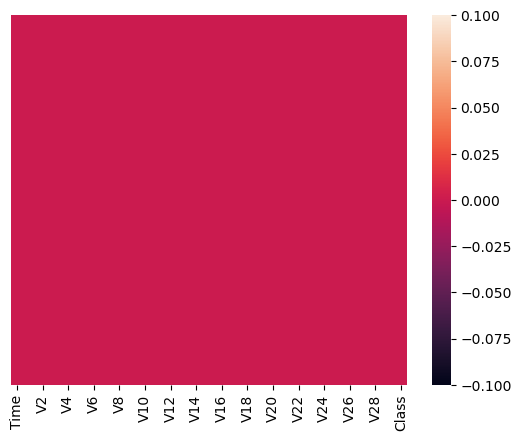

In [11]:
# find missing value using graph
sns.heatmap(credit_card.isnull(),yticklabels=False)  # means there is no any null value

In [12]:
def missing(data):
    missing_number=credit_card.isnull().sum().sort_values(ascending=False)
    missing_percent=(credit_card.isnull().sum()/len(credit_card))
    missing_value=pd.concat([missing_number,missing_percent],axis=1,keys=['missing_number','missing_percent'])
    return missing_value
    

In [13]:
missing(credit_card)

,missing_number,missing_percent
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


In [14]:
credit_card.isnull().sum().max()

0

In [15]:
#percent of Fraud and no fraud
print("No Fraud:",round(credit_card['Class'].value_counts()[0]/len(credit_card)*100,2),"% of the dataset")
print("Fraud:",round(credit_card['Class'].value_counts()[1]/len(credit_card)*100,2),"% of the dataset")

No Fraud: 99.83 % of the dataset
Fraud: 0.17 % of the dataset


Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

C:\Users\HAQUE COMPUTER\AppData\Local\Temp\ipykernel_18740\3647296869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card['Amount'],color='r',bins=10)
C:\Users\HAQUE COMPUTER\AppData\Local\Temp\ipykernel_18740\3647296869.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card

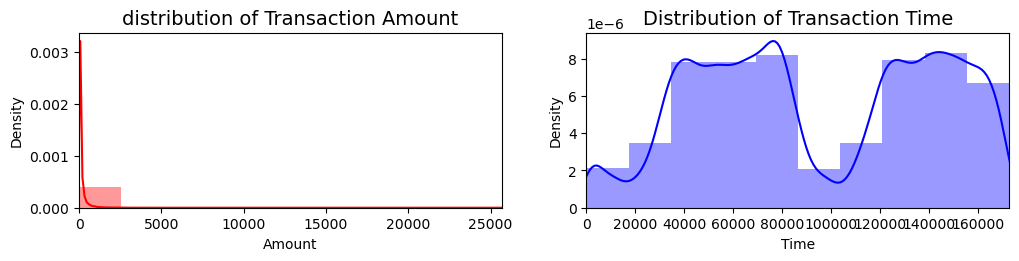

In [16]:
plt.figure(figsize=(12,5))
bound=plt.subplot(2,2,1)
sns.distplot(credit_card['Amount'],color='r',bins=10)
bound.set_title('distribution of Transaction Amount',fontsize=14)
bound.set_xlim([min(credit_card['Amount']), max(credit_card['Amount'])])
bound1=plt.subplot(2,2,2)
sns.distplot(credit_card['Time'],color='b',bins=10)
bound1.set_title('Distribution of Transaction Time',fontsize=14)
bound1.set_xlim([min(credit_card['Time']),max(credit_card['Time'])])
plt.show()

In [4]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

credit_card['scaled_amount'] = rob_scaler.fit_transform(credit_card['Amount'].values.reshape(-1,1))
credit_card['scaled_time'] = rob_scaler.fit_transform(credit_card['Time'].values.reshape(-1,1))

credit_card.drop(['Time','Amount'], axis=1, inplace=True)

In [5]:
scaled_amount = credit_card['scaled_amount']
scaled_time = credit_card['scaled_time']

credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_card.insert(0, 'scaled_amount', scaled_amount)
credit_card.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

credit_card.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Splitting the Data (Original DataFrame)
Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [6]:
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']


In [7]:
# print the shape of x and y
print(X.shape,y.shape)

(284807, 30) (284807,)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
# Splitting the data to train and test with test size of 30% from train data 
# random state is used so that train and test data are maintained; 
#stratify is used as the data given is a class imbalance problem
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)

In [10]:
print("The shape of X_train:",X_train.shape)
print("The shape of X_test:",X_test.shape)
print("The shape of y_train:",y_train.shape)
print("The shape of y_test:",y_test.shape)

The shape of X_train: (199364, 30)
The shape of X_test: (85443, 30)
The shape of y_train: (199364,)
The shape of y_test: (85443,)


# Random Under-Sampling

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
  1)The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)<br>
 2)Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.<br>
3)After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.
<br>
Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [11]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

credit_card = credit_card.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = credit_card.loc[credit_card['Class'] == 1]
non_fraud_df = credit_card.loc[credit_card['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
209638,1.104870,0.622117,1.851051,0.038099,-1.664612,1.452855,0.460400,-1.083145,0.862385,-0.523485,...,-0.023517,0.122126,0.440515,-0.100190,0.035534,0.471633,-0.504041,-0.022947,-0.042904,0
96789,1.110878,-0.220350,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,...,-0.478219,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,1
242264,1.536086,0.783891,-0.923808,-0.376830,-0.172859,0.017448,0.519135,0.002036,0.119420,0.521574,...,0.310032,-0.113740,-0.836554,0.627510,-0.008917,-1.499285,-0.278977,0.105998,0.095200,0
42741,6.107315,-0.510638,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,...,-0.645394,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,1
124115,-0.293440,-0.088229,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,...,0.058063,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1


# Correlation Matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.<br>
Summary and Explanation:<br>
 1)Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.<br>
2)Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.<br>
3)BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.<br>
Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

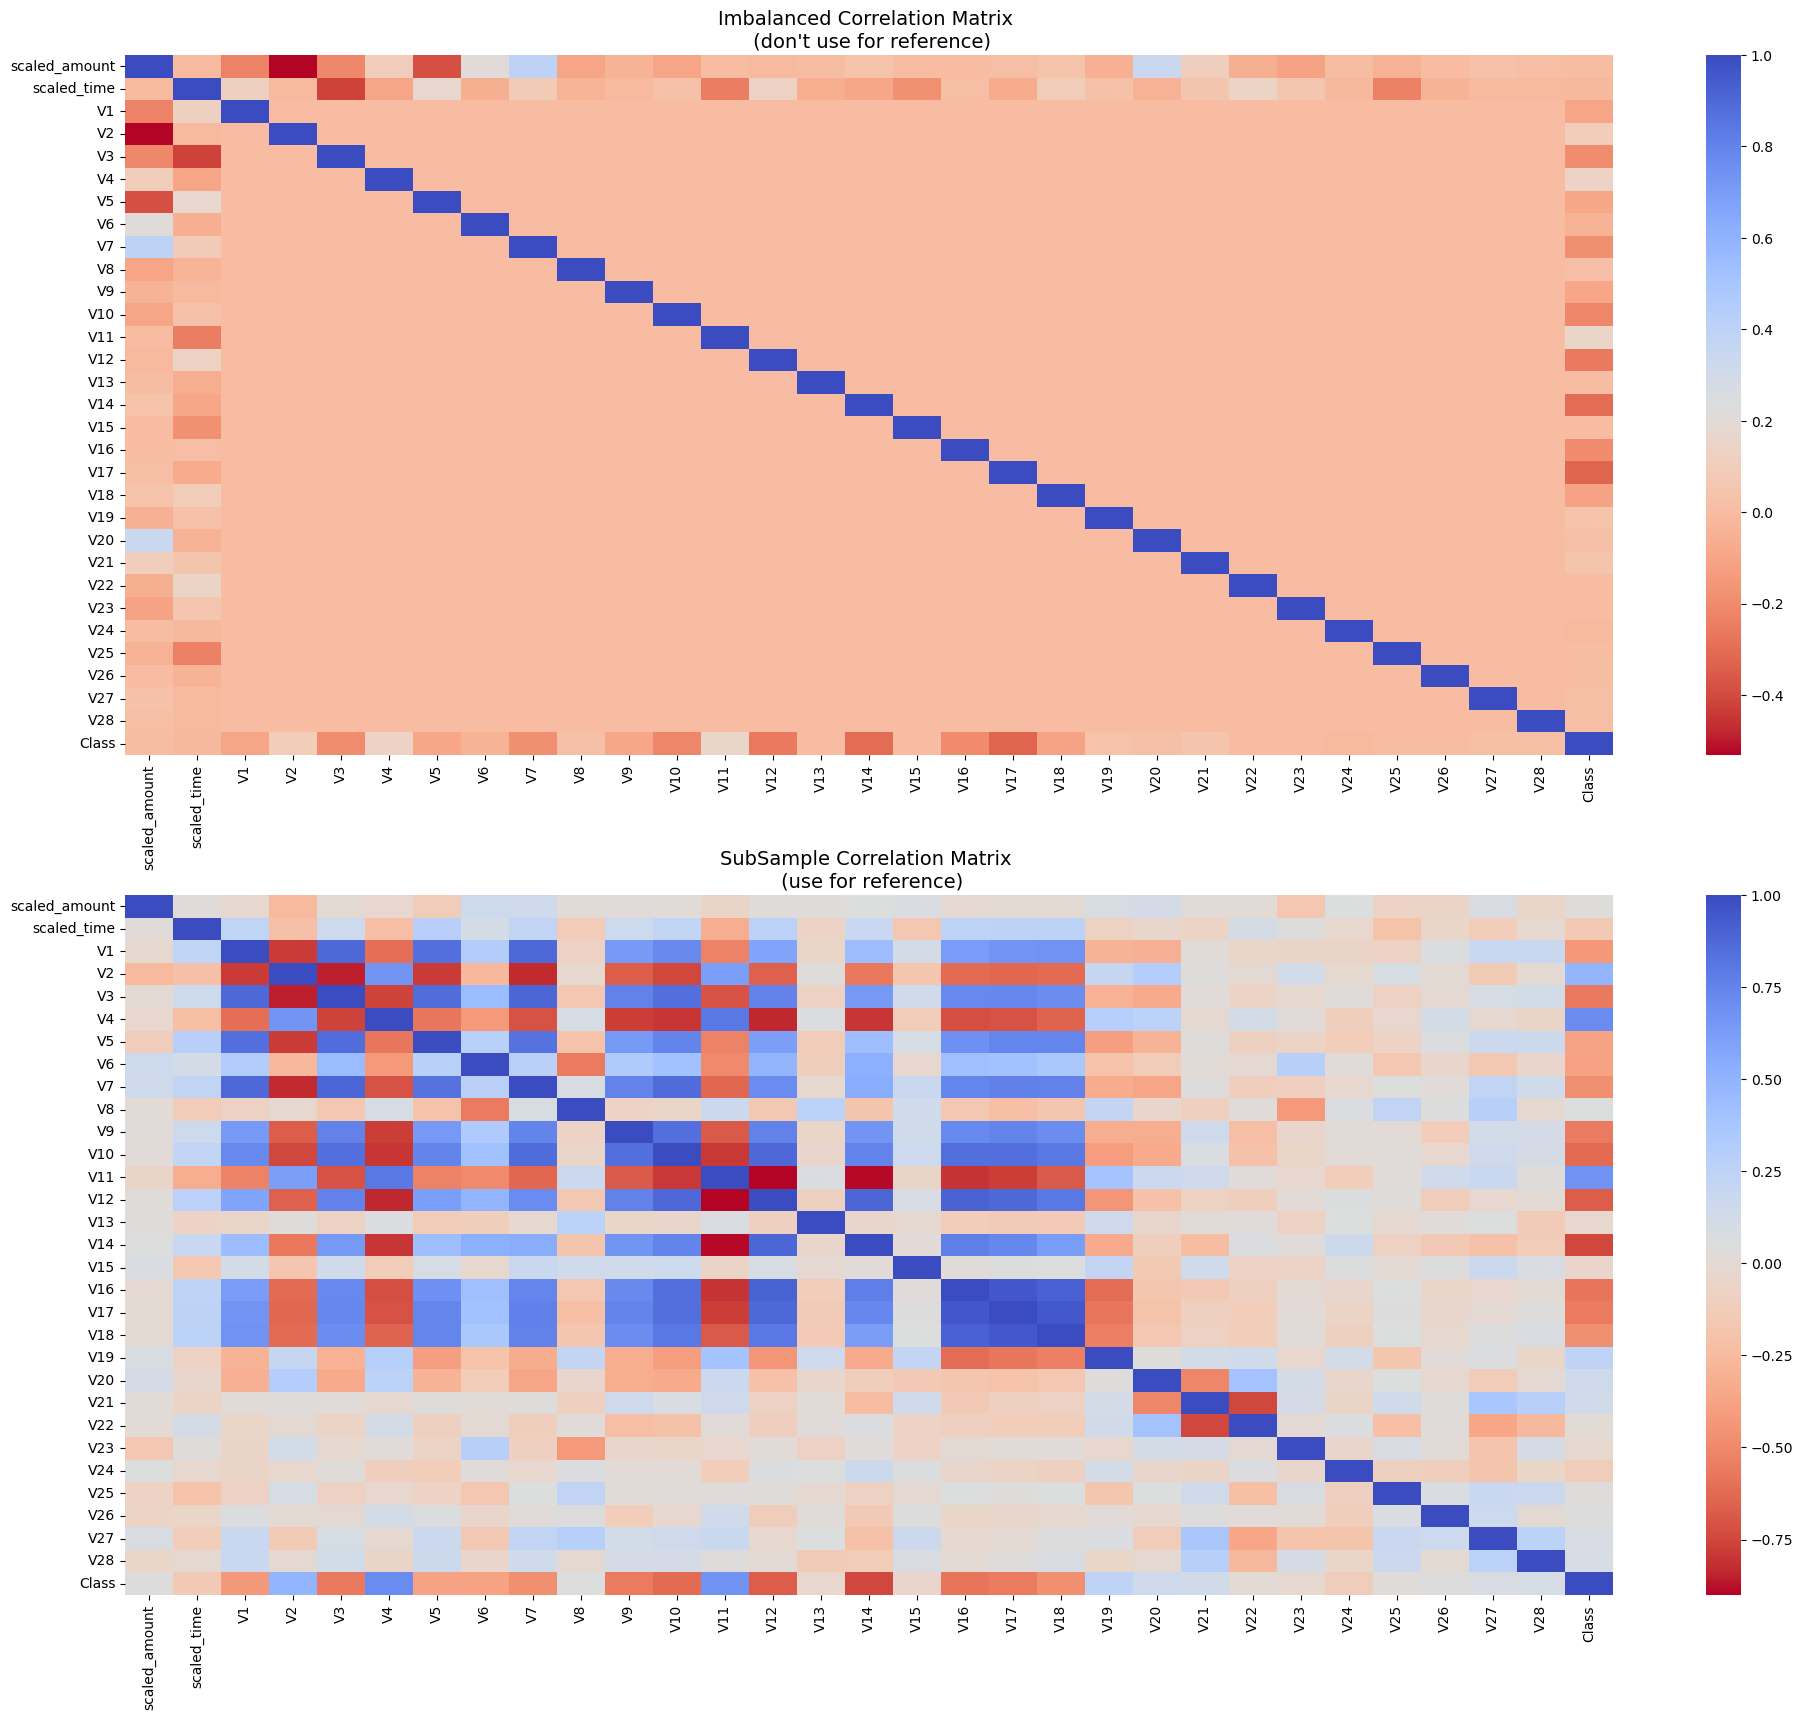

In [12]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = credit_card.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [13]:
# Importing the required classifiers for model building:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

imbalance dataset using over sampling method SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_train_sm.shape

(398040, 30)

In [15]:
print(pd.value_counts(y_train_sm, normalize=True) * 100)

0    50.0
1    50.0
Name: Class, dtype: float64


In [16]:
scores = pd.DataFrame(columns=['Model', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                train_recall, train_precision, train_f1score,
                                                test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [17]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

# LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)
Model=logistic_model.fit(X_train_sm,y_train_sm)
y_train_Pred_log = logistic_model.predict(X_train_sm)
y_test_Pred_log = logistic_model.predict(X_test)
y_pred = logistic_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred)
print(cmr)

[[83525  1770]
 [   20   128]]


In [20]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[83525  1770]
 [   20   128]]

True Positives(TP) =  83525

True Negatives(TN) =  128

False Positives(FP) =  1770

False Negatives(FN) =  20


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9220566776988608

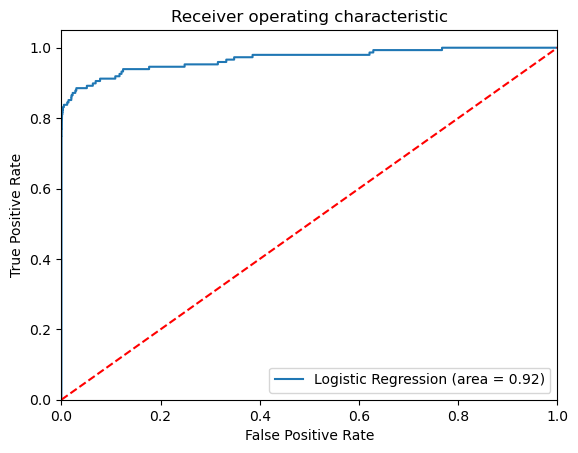

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [23]:
classifcation_report_train_test(y_train_sm, y_train_Pred_log, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9373    0.9787    0.9575    199020
           1     0.9777    0.9345    0.9556    199020

    accuracy                         0.9566    398040
   macro avg     0.9575    0.9566    0.9566    398040
weighted avg     0.9575    0.9566    0.9566    398040


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9998    0.9792    0.9894     85295
           1     0.0674    0.8649    0.1251       148

    accuracy                         0.9791     85443
   macro avg     0.5336    0.9221    0.5573     85443
weighted avg     0.9981    0.9791    0.9879     85443



In [24]:
scores=get_metrics(y_train_sm,y_train_Pred_log,y_test,y_test_Pred_log,"Logistic",scores)
scores

C:\Users\HAQUE COMPUTER\AppData\Local\Temp\ipykernel_20912\3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.956592,0.957486,0.956571,0.97905,0.998146,0.987901


# XGBClassifier

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb = XGBClassifier()

In [32]:
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred_train_xsmote = xgb.predict(X_train_sm)
y_pred_test_xsmote = xgb.predict(X_test)

In [34]:
classifcation_report_train_test(y_train_sm, y_pred_train_xsmote, y_test, y_pred_test_xsmote)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    199020
           1     1.0000    1.0000    1.0000    199020

    accuracy                         1.0000    398040
   macro avg     1.0000    1.0000    1.0000    398040
weighted avg     1.0000    1.0000    1.0000    398040


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     85295
           1     0.8310    0.7973    0.8138       148

    accuracy                         0.9994     85443
   macro avg     0.9153    0.8985    0.9067     85443
weighted avg     0.9994    0.9994    0.9994     85443



In [35]:
scores = get_metrics(y_train_sm, y_pred_train_xsmote, y_test, y_pred_test_xsmote, "Xgboost_smote", scores)
scores

C:\Users\HAQUE COMPUTER\AppData\Local\Temp\ipykernel_20912\3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.956592,0.957486,0.956571,0.979050,0.998146,0.987901
1,Xgboost_smote,1.000000,1.000000,1.000000,0.999368,0.999356,0.999361


# Test_data

In [38]:
final_pred=pd.DataFrame(final_pred)

In [39]:
final_pred.rename(columns={0:'class'},inplace=True)

In [40]:
final_pred.head(3)

,class
0,0
1,0
2,0
